> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

In [1]:
options(repr.plot.width = 15, repr.plot.height = 6)

# 5

## 모형1

$Z_t - 9.5 = \epsilon_t - 1.3 \epsilon_{t-1} + 0.6 \epsilon_{t-2}$

$(Z_t - 9.5) =  (1-1.3B+0.6B^2) \epsilon_t, MA(2)$

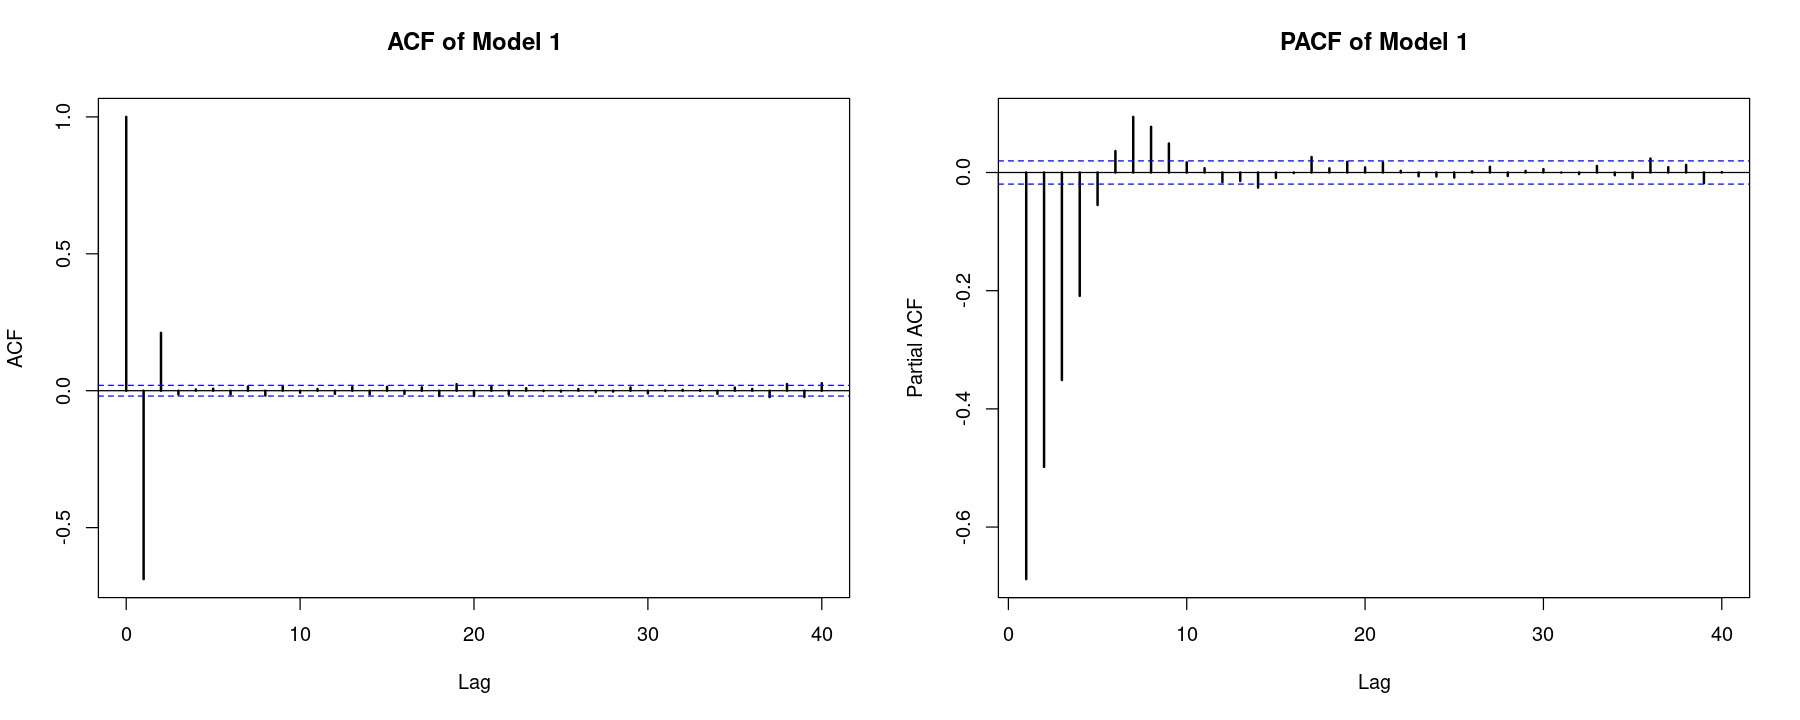

In [3]:
z <- arima.sim(n=10000, list(ma=c(-1.3, 0.6))) + 9.5
par(mfrow=c(1,2))
acf_z <- acf(z, lwd=2, main="ACF of Model 1", )
pacf_z <- pacf(z, lwd=2, main = "PACF of Model 1")

In [4]:
acf_z[1:10]


Autocorrelations of series ‘z’, by lag

     1      2      3      4      5      6      7      8      9     10 
-0.688  0.211 -0.014  0.004  0.007 -0.014  0.015 -0.018  0.015 -0.007 

In [5]:
pacf_z[1:10]


Partial autocorrelations of series ‘z’, by lag

     1      2      3      4      5      6      7      8      9     10 
-0.688 -0.498 -0.351 -0.209 -0.055  0.036  0.094  0.077  0.049  0.017 

## 모형2

$Z_t - 0.6 Z_{t-1} = 38 + \epsilon_t + 0.9 \epsilon_{t-1}$

$(1-0.6B)(Z_t - 95) = (1+0.9B) \epsilon_t: ARMA(1,1)$

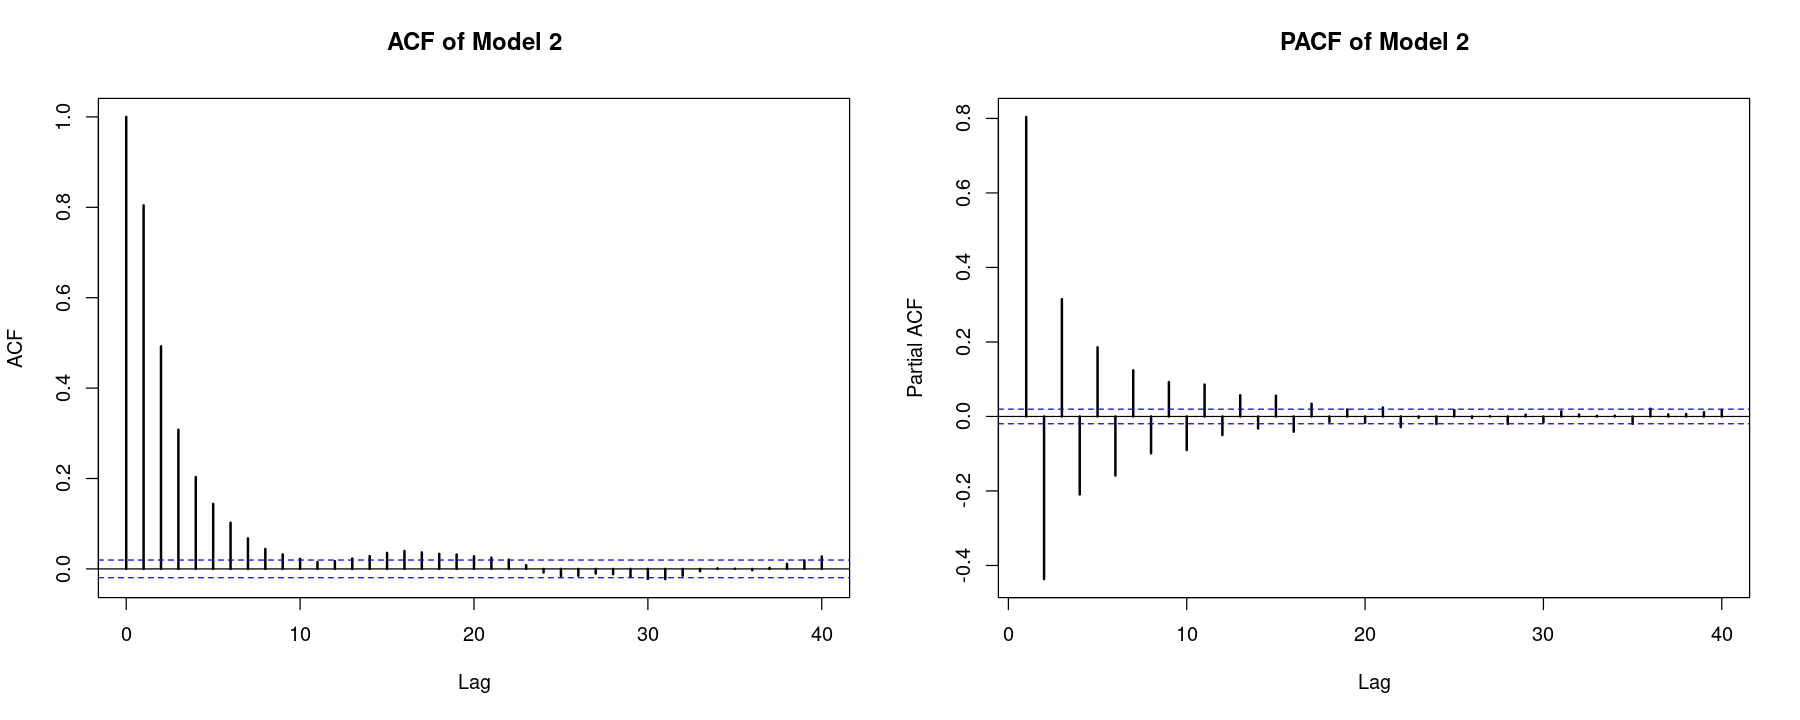

In [6]:
z <- arima.sim(n=10000, list(ar=0.6, ma=0.9)) + 95
par(mfrow=c(1,2))
acf_z <- acf(z, lwd=2, main="ACF of Model 2", )
pacf_z <- pacf(z, lwd=2, main = "PACF of Model 2")

In [7]:
acf_z[1:10]


Autocorrelations of series ‘z’, by lag

    1     2     3     4     5     6     7     8     9    10 
0.804 0.492 0.308 0.203 0.144 0.102 0.067 0.044 0.032 0.022 

In [8]:
pacf_z[1:10]


Partial autocorrelations of series ‘z’, by lag

     1      2      3      4      5      6      7      8      9     10 
 0.804 -0.437  0.315 -0.209  0.186 -0.159  0.124 -0.099  0.092 -0.090 

## 모형3

$Z_t = 26 + 0.6 Z_{t-1} + \epsilon_t + 0.2 \epsilon_{t-1} + 0.5 \epsilon_{t-2}$

$(1-0.6B)(Z_t - 65) = (1+0.2B + 0.5 B^2) \epsilon_t : ARMA(1,2)$

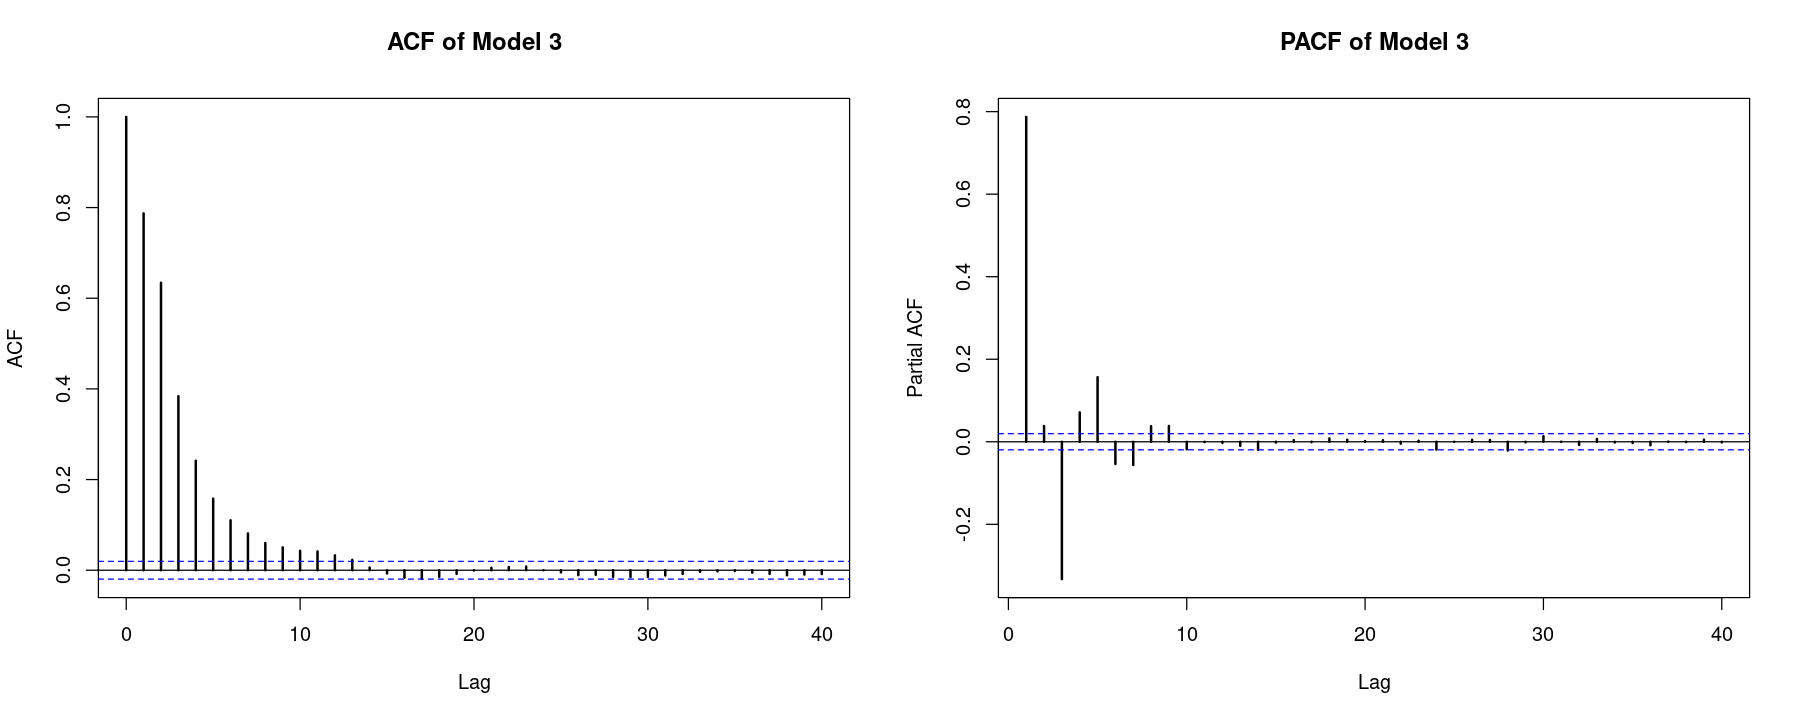

In [10]:
z <- arima.sim(n=10000, list(ar=0.6, ma=c(0.2,0.5))) + 65
par(mfrow=c(1,2))
acf_z <- acf(z, lwd=2, main="ACF of Model 3", )
pacf_z <- pacf(z, lwd=2, main = "PACF of Model 3")

In [11]:
acf_z[1:10]


Autocorrelations of series ‘z’, by lag

    1     2     3     4     5     6     7     8     9    10 
0.787 0.634 0.384 0.241 0.158 0.110 0.081 0.060 0.050 0.043 

In [12]:
pacf_z[1:10]


Partial autocorrelations of series ‘z’, by lag

     1      2      3      4      5      6      7      8      9     10 
 0.787  0.038 -0.333  0.071  0.157 -0.054 -0.056  0.038  0.038 -0.018 

## 모형 4

$Z_t - 1.5 Z_{t-1} + 0.7 Z_{t-2} = 100 + \epsilon_t - 0.5 \epsilon_{t-1}$

$(1-1.5B + 0.7B^2)(Z_t - 500) = (1-0.5B)\epsilon_t : ARMA(2,1)$

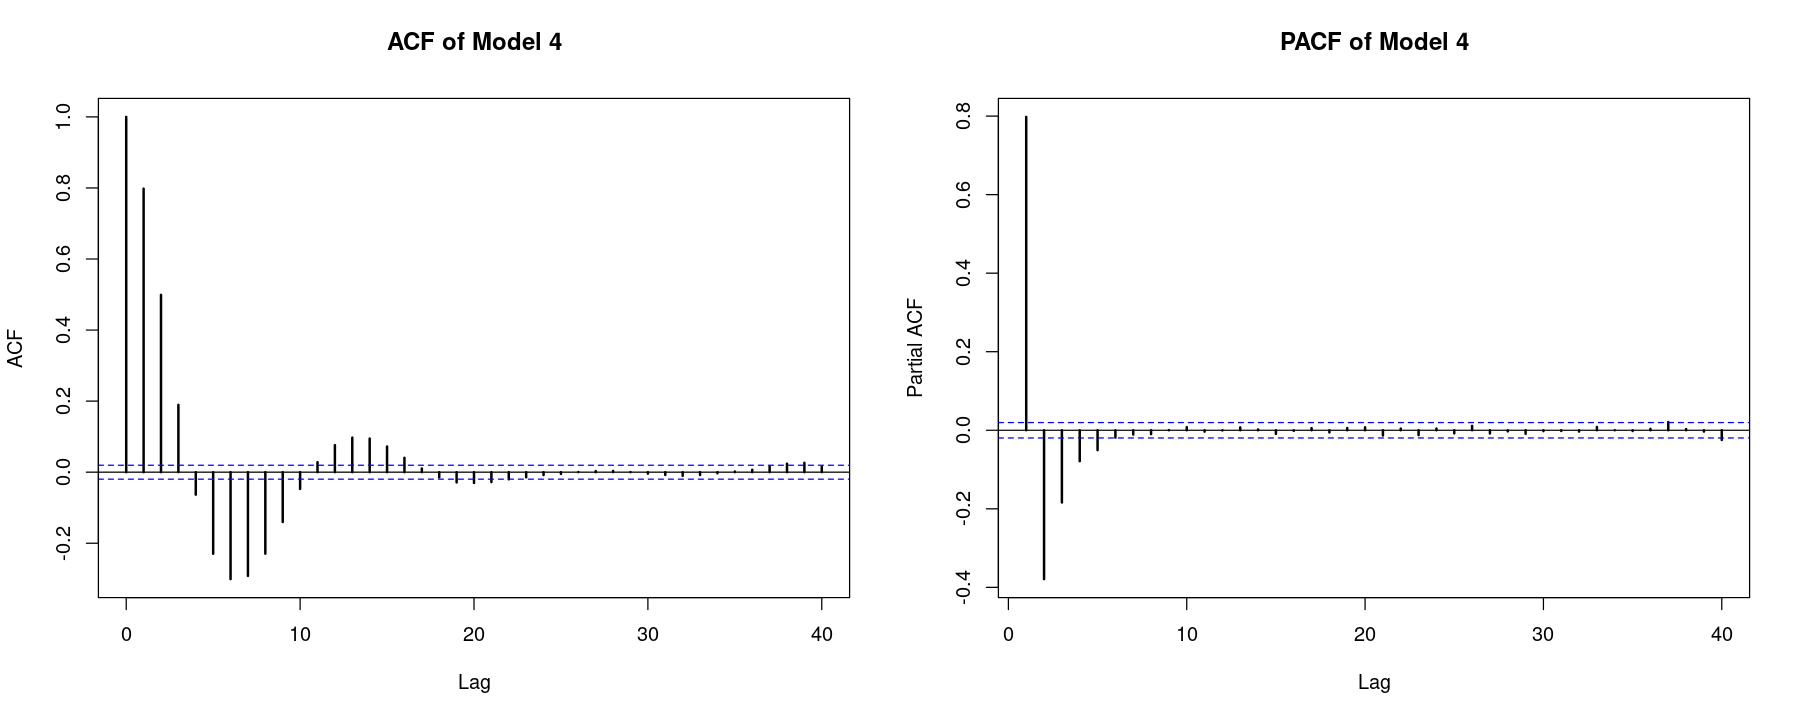

In [13]:
z <- arima.sim(n=10000, list(ar=c(1.5,-0.7), ma=-0.5)) + 500
par(mfrow=c(1,2))
acf_z <- acf(z, lwd=2, main="ACF of Model 4", )
pacf_z <- pacf(z, lwd=2, main = "PACF of Model 4")

In [14]:
acf_z[1:10]


Autocorrelations of series ‘z’, by lag

     1      2      3      4      5      6      7      8      9     10 
 0.798  0.499  0.189 -0.063 -0.230 -0.301 -0.292 -0.229 -0.140 -0.047 

In [15]:
pacf_z[1:10]


Partial autocorrelations of series ‘z’, by lag

     1      2      3      4      5      6      7      8      9     10 
 0.798 -0.379 -0.184 -0.079 -0.051 -0.019 -0.011 -0.010  0.000  0.008 

# 7

확률과정 $Z_t = 1+ 0.9 Z_{t-1} + \epsilon_t, t=1,2, \dots, 100$으로부터 시계열 자료를 생성한 후 다음을 수행하라. 단 $Z_0 = 10$의 값을 주고 $\epsilon_t \sim_{i.i.d} N(0,1)$이다.

$\mu = \delta/(1-0.9) = 1/0.1 = 10 \rightarrow ( 1-0.9B)(Z_t - 10) = \epsilon_t$

In [18]:
ar_sim <- function(n, phi, mu, z0, sigma){
    z <- c(z0)
    for (k in 2:n){
    z[k] = (1-phi)*mu + phi * z[k-1] + rnorm(1,0,sigma)
}
    return(z)
}

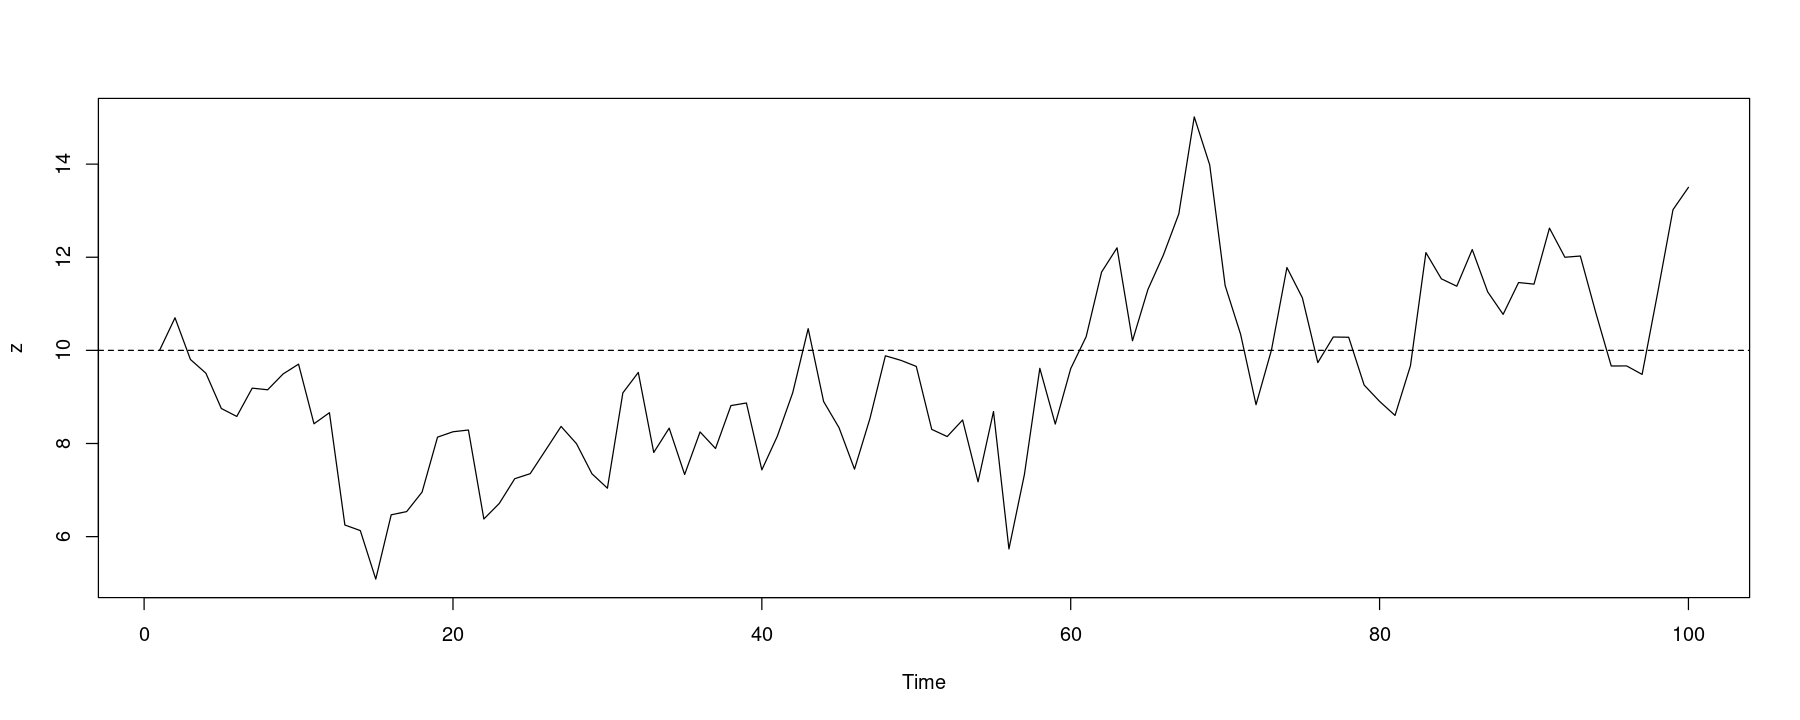

In [19]:
z <- ar_sim(100, 0.9, 10, 10, 1)
plot.ts(z)
abline(h=10, lty=2)

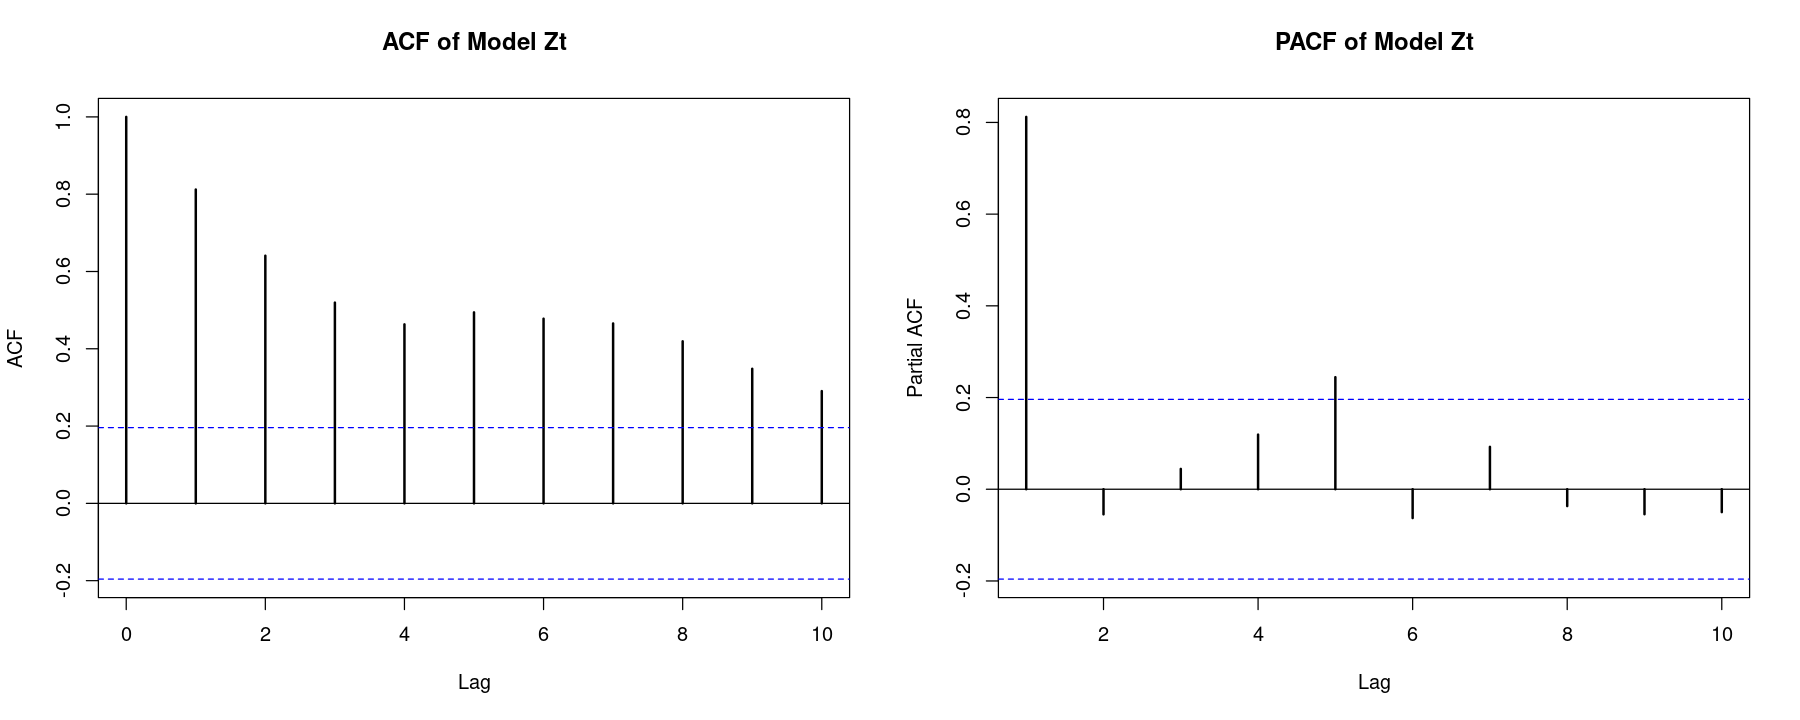

In [20]:
par(mfrow=c(1,2))
acf_z <- acf(z, lwd=2, main="ACF of Model Zt", lag.max=10)
pacf_z <- pacf(z, lwd=2, main = "PACF of Model Zt", lag.max=10)

In [21]:
acf_z[1:2]


Autocorrelations of series ‘z’, by lag

    1     2 
0.812 0.641 

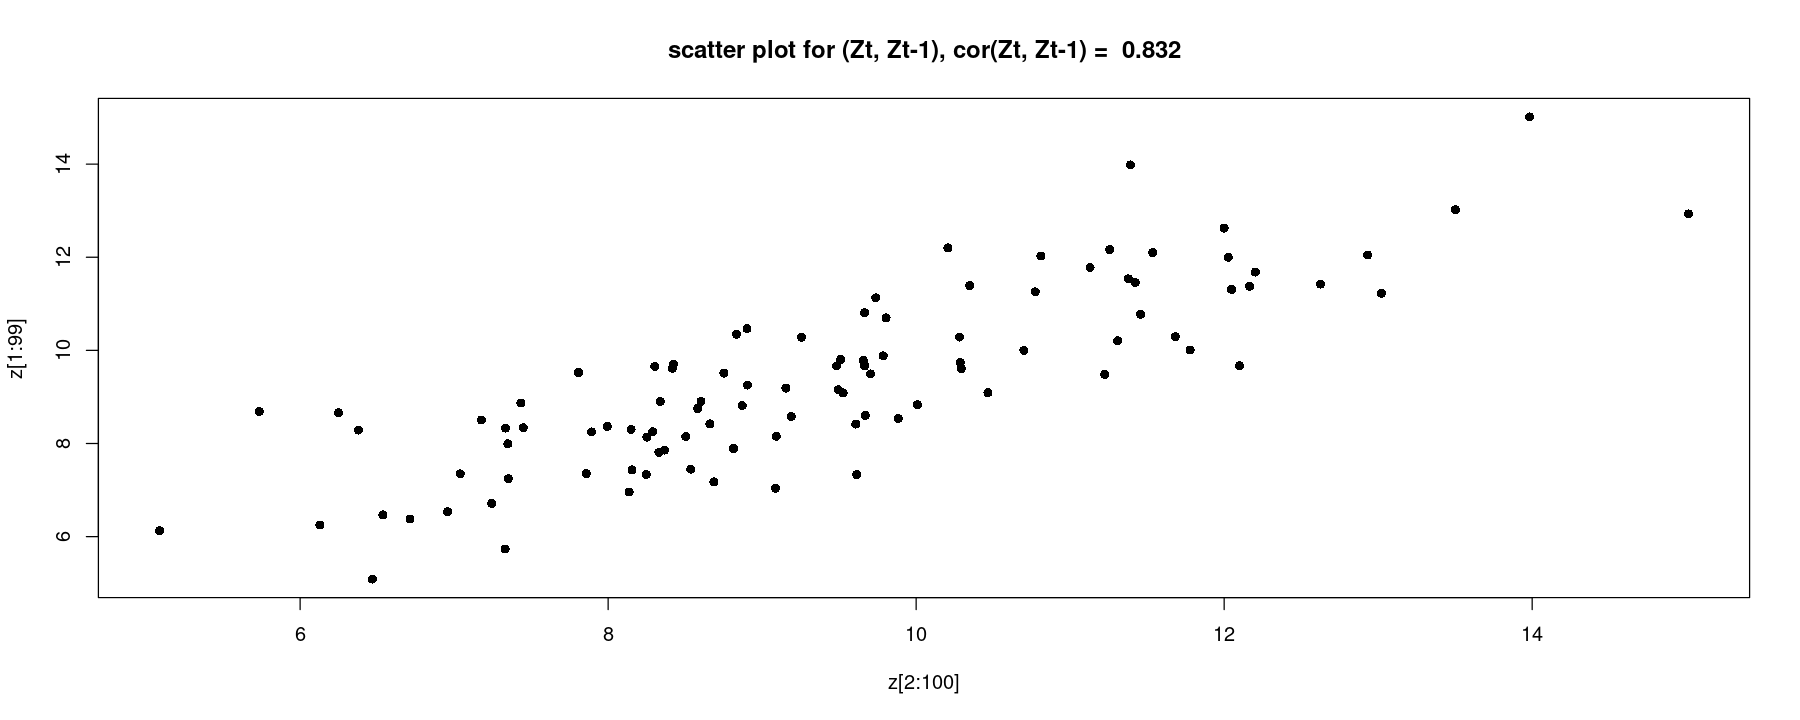

In [22]:
plot(z[2:100], z[1:99], pch=16,
main = paste("scatter plot for (Zt, Zt-1), cor(Zt, Zt-1) = ", round(cor(z[2:100], z[1:99]),3)))

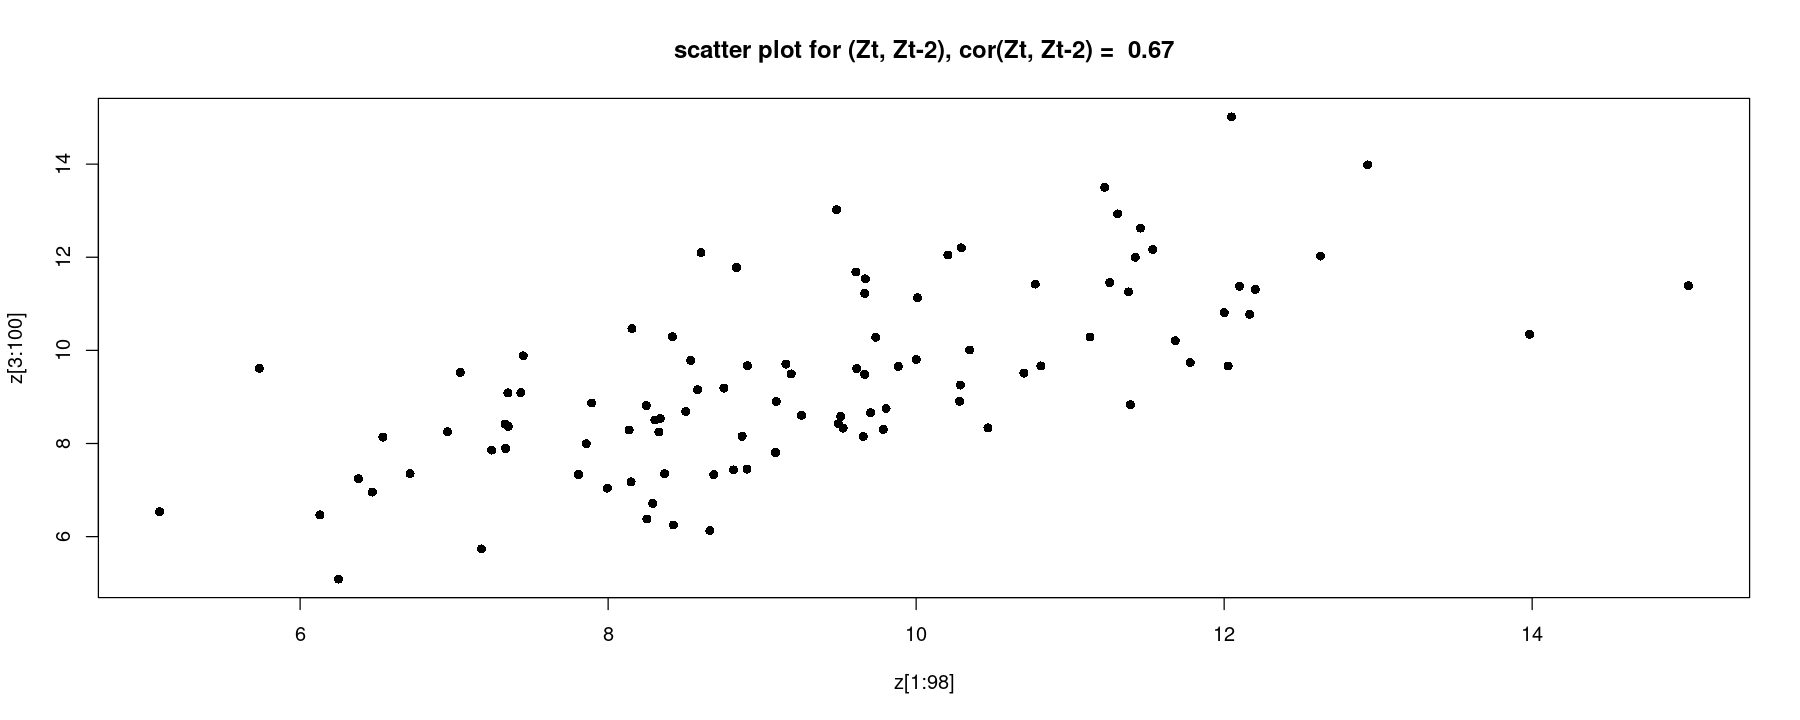

In [23]:
plot(z[1:98], z[3:100], pch=16, main = paste("scatter plot for (Zt, Zt-2), cor(Zt, Zt-2) = ", round(cor(z[1:98], z[3:100]),3)))